# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import QTable, vstack

## Shared IP Distribution

In [2]:
nasa_shared = QTable.read('data/shared_nasa.ecsv', format='ascii.ecsv')

In [3]:
# Convert to float if string
nasa_shared_ips = [float(x) for x in nasa_shared['ip']]
print(f"Minimum Impact Prob in Unique NASA: {min(nasa_shared_ips)}")

# Count how many are extremely low risk (< 1e-6)
nasa_low_risk_shared = sum(1 for x in nasa_shared_ips if x < 1e-6)
print(f"Percentage of NASA shared objects that are low risk: {nasa_low_risk_shared / len(nasa_shared_ips) * 100:.1f}%")

# Count how many are extremely high risk (< 1e-3)
nasa_high_risk_shared = sum(1 for x in nasa_shared_ips if x > 1e-3)
print(f"Percentage of NASA shared objects that are high risk: {nasa_high_risk_shared / len(nasa_shared_ips) * 100:.1f}%")

Minimum Impact Prob in Unique NASA: 1.381e-10
Percentage of NASA shared objects that are low risk: 30.2%
Percentage of NASA shared objects that are high risk: 1.4%


In [4]:
esa_shared = QTable.read('data/shared_esa.ecsv', format='ascii.ecsv')

In [5]:
# Convert to float if string
esa_shared_ips = [float(x) for x in esa_shared['ip_cum']]
print(f"Minimum Impact Prob in Unique ESA: {min(esa_shared_ips)}")

# Count how many are extremely low risk (< 1e-6)
esa_low_risk_shared = sum(1 for x in esa_shared_ips if x < 1e-6)
print(f"Percentage of ESA shared objects that are low risk: {esa_low_risk_shared / len(esa_shared_ips) * 100:.1f}%")

# Count how many are extremely high risk (< 1e-3)
esa_high_risk_shared = sum(1 for x in esa_shared_ips if x > 1e-3)
print(f"Percentage of ESA shared objects that are high risk: {esa_high_risk_shared / len(esa_shared_ips) * 100:.1f}%")

Minimum Impact Prob in Unique ESA: 1.09e-11
Percentage of ESA shared objects that are low risk: 37.0%
Percentage of ESA shared objects that are high risk: 1.5%


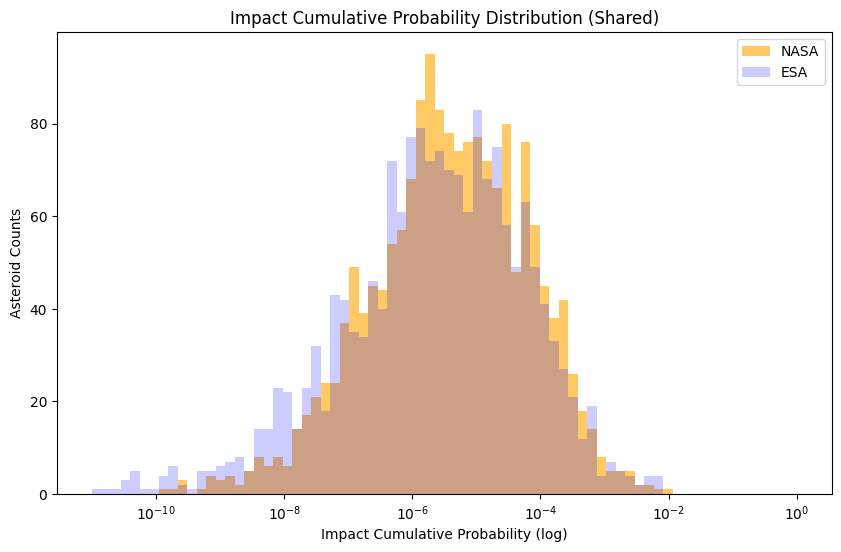

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))

bins = np.logspace(-11, 0, 75)

ax.hist(nasa_shared_ips, bins=bins, alpha=0.6, label='NASA', color='orange')
ax.hist(esa_shared_ips, bins=bins, alpha=0.2, label='ESA', color='blue')

ax.set_xscale('log')

ax.set_title("Impact Cumulative Probability Distribution (Shared)")
ax.set_xlabel("Impact Cumulative Probability (log)")
ax.set_ylabel("Asteroid Counts")

ax.legend();

plt.show()